##Biblioteke

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import MeanShift,BisectingKMeans
from sklearn.cluster import DBSCAN
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn.metrics import silhouette_score, calinski_harabasz_score,davies_bouldin_score
from sklearn.metrics import  adjusted_rand_score
import warnings
warnings.filterwarnings('ignore')

##Ucitavanje

In [152]:
url = "https://raw.githubusercontent.com/aleksicmilica/ml-projekat2/main/bank_marketing_dataset.csv"
dataset= pd.read_csv(url)

In [153]:
dataset.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  subscribed  
0          93.994          -36.4      4.857       5191.0          no  
1          93.994          -36.4      4.857       5191.0          no  
2          93.994          -36.4      4.857       5191.0          no  
3          93.994          -36.4      4.857       5191.0          no  
4          93.994          -36.4      4.857       5191.0          no  

[5 rows x 21 columns]

In [154]:
dataset.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')

In [155]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Predobrada


###Provera prisustva missing values



In [156]:
total_missing = dataset.isnull().sum()
print(total_missing)
if (total_missing == 0).all():
  print("Sve vrednosti su prisutne u dataset-u")

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribed        0
dtype: int64
Sve vrednosti su prisutne u dataset-u


###Provera da li su svi podaci odgovarajuceg tipa

In [157]:
irregular_values =  (dataset["duration"] < 0).sum() + (dataset["campaign"] < 0).sum() + (dataset["pdays"] < 0).sum() + (dataset["previous"] < 0).sum() + (dataset["cons.price.idx"] < 0).sum()+ (dataset["euribor3m"] < 0).sum()+ (dataset["nr.employed"] < 0).sum()
print(irregular_values)

0


In [158]:
numerical_type = pd.api.types.is_numeric_dtype(dataset["age"].dtype) and pd.api.types.is_numeric_dtype(dataset["duration"].dtype) and pd.api.types.is_numeric_dtype(dataset["campaign"].dtype) and pd.api.types.is_numeric_dtype(dataset["pdays"].dtype) and pd.api.types.is_numeric_dtype(dataset["previous"].dtype) and pd.api.types.is_numeric_dtype(dataset["emp.var.rate"].dtype)and pd.api.types.is_numeric_dtype(dataset["cons.price.idx"].dtype)and pd.api.types.is_numeric_dtype(dataset["cons.conf.idx"].dtype)and pd.api.types.is_numeric_dtype(dataset["euribor3m"].dtype)and pd.api.types.is_numeric_dtype(dataset["nr.employed"].dtype)
print(numerical_type)

True


In [159]:
if irregular_values == 0 and numerical_type :
  print("Svi podaci su odgovarajuceg tipa")
else:
  print("Podaci nisu odgovarajuceg tipa")

Svi podaci su odgovarajuceg tipa


###Vizuelizacija podataka

In [160]:
columns = dataset.columns
n = len(columns)

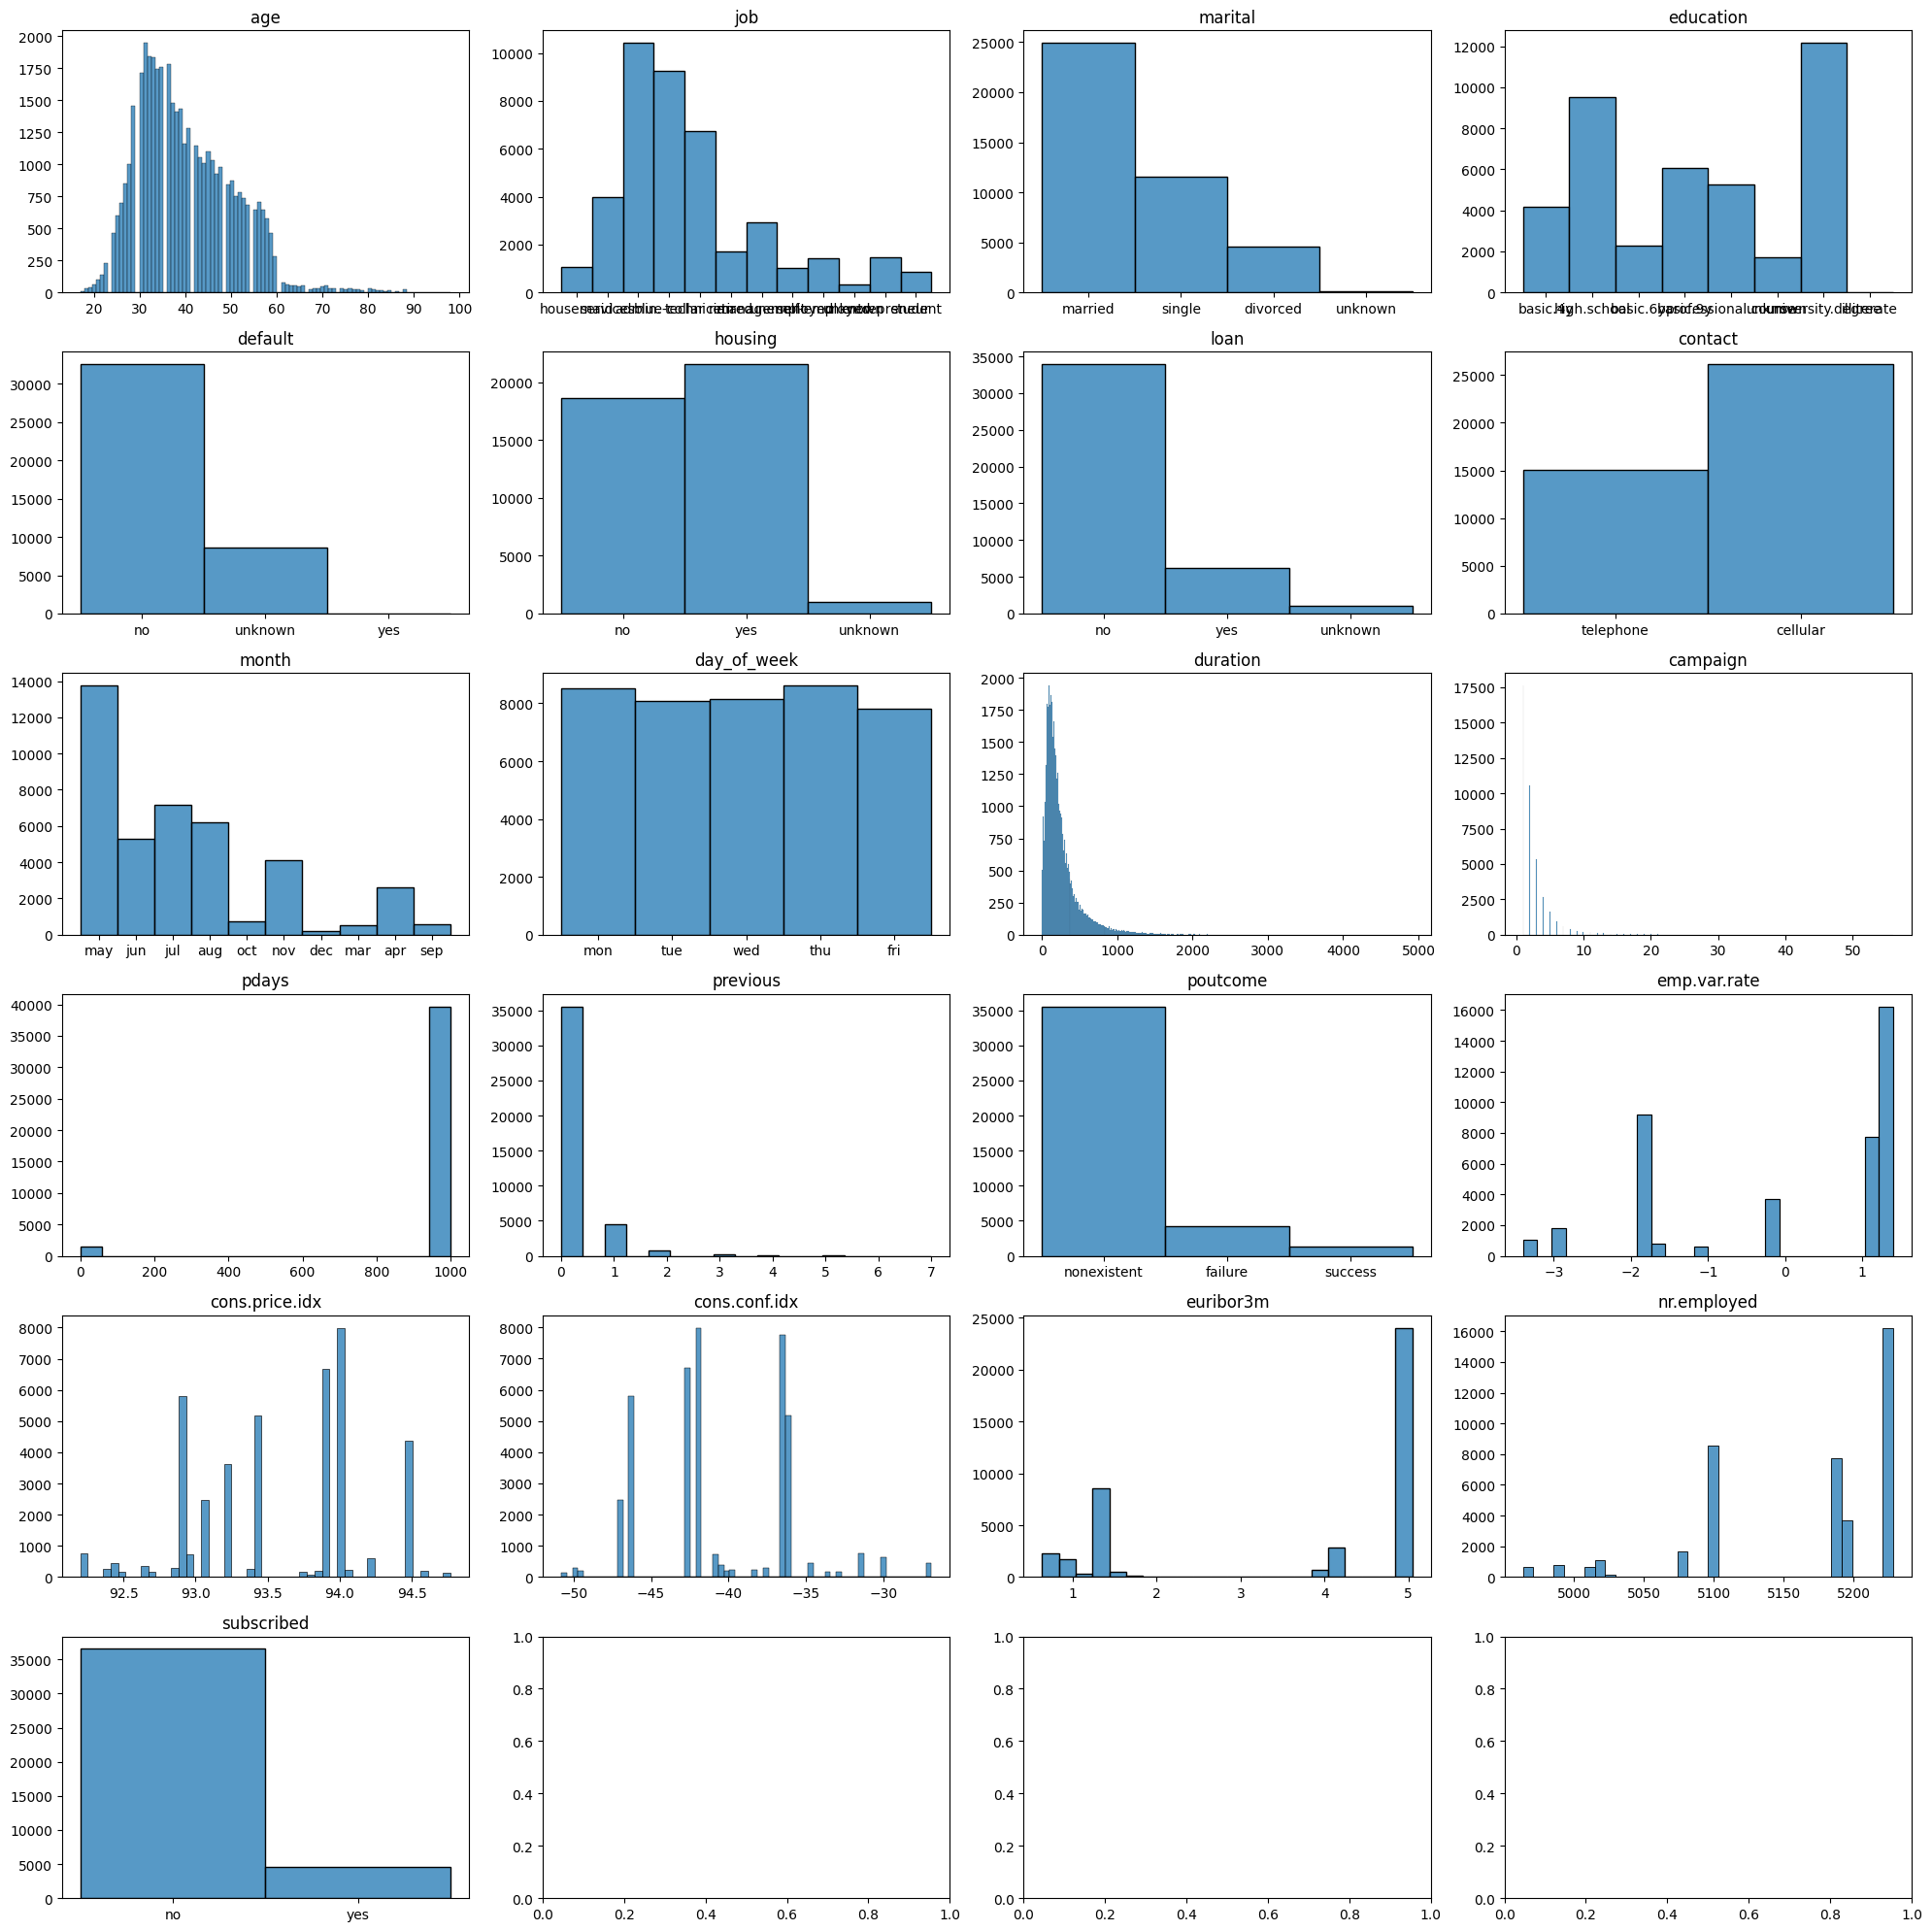

In [161]:
fig, axes = plt.subplots(n//4+1, 4, figsize=(20, 20))
axes = axes.flatten()
for i, column_name in enumerate(columns):
    sns.histplot(x=column_name, data=dataset, ax=axes[i])
    axes[i].set_title(column_name)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

In [162]:
dataset_2 = dataset.copy()

#### Labeliranje kategorickih tipova

In [163]:
lista = ["job","marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome", "subscribed"]
for el in lista:
  possible_location = dataset[el].unique().tolist()
  # possible_location.insert(0,'nan')
  dict_help ={}
  for i in range(len(possible_location)):
    dict_help[possible_location[i]] = i
  print(dict_help)
  dataset.replace({el:dict_help},inplace = True)
dataset

{'housemaid': 0, 'services': 1, 'admin.': 2, 'blue-collar': 3, 'technician': 4, 'retired': 5, 'management': 6, 'unemployed': 7, 'self-employed': 8, 'unknown': 9, 'entrepreneur': 10, 'student': 11}
{'married': 0, 'single': 1, 'divorced': 2, 'unknown': 3}
{'basic.4y': 0, 'high.school': 1, 'basic.6y': 2, 'basic.9y': 3, 'professional.course': 4, 'unknown': 5, 'university.degree': 6, 'illiterate': 7}
{'no': 0, 'unknown': 1, 'yes': 2}
{'no': 0, 'yes': 1, 'unknown': 2}
{'no': 0, 'yes': 1, 'unknown': 2}
{'telephone': 0, 'cellular': 1}
{'may': 0, 'jun': 1, 'jul': 2, 'aug': 3, 'oct': 4, 'nov': 5, 'dec': 6, 'mar': 7, 'apr': 8, 'sep': 9}
{'mon': 0, 'tue': 1, 'wed': 2, 'thu': 3, 'fri': 4}
{'nonexistent': 0, 'failure': 1, 'success': 2}
{'no': 0, 'yes': 1}


age  job  marital  education  default  housing  loan  contact  month  \
0       56    0        0          0        0        0     0        0      0   
1       57    1        0          1        1        0     0        0      0   
2       37    1        0          1        0        1     0        0      0   
3       40    2        0          2        0        0     0        0      0   
4       56    1        0          1        0        0     1        0      0   
...    ...  ...      ...        ...      ...      ...   ...      ...    ...   
41183   73    5        0          4        0        1     0        1      5   
41184   46    3        0          4        0        0     0        1      5   
41185   56    5        0          6        0        1     0        1      5   
41186   44    4        0          4        0        0     0        1      5   
41187   74    5        0          4        0        1     0        1      5   

       day_of_week  ...  campaign  pdays  previous  poutcome  emp.var.rate  \
0                0  ...         1    999         0         0           1.1   
1                0  ...         1    999         0         0           1.1   
2                0  ...         1    999         0         0           1.1   
3                0  ...         1    999         0         0           1.1   
4                0  ...         1    999         0         0           1.1   
...            ...  ...       ...    ...       ...       ...           ...   
41183            4  ...         1    999         0         0          -1.1   
41184            4  ...         1    999         0         0          -1.1   
41185            4  ...         2    999         0         0          -1.1   
41186            4  ...         1    999         0         0          -1.1   
41187            4  ...         3    999         1         1          -1.1   

       cons.price.idx  cons.conf.idx  euribor3m  nr.employed  subscribed  
0              93.994          -36.4      4.857       5191.0           0  
1              93.994          -36.4      4.857       5191.0           0  
2              93.994          -36.4      4.857       5191.0           0  
3              93.994          -36.4      4.857       5191.0           0  
4              93.994          -36.4      4.857       5191.0           0  
...               ...            ...        ...          ...         ...  
41183          94.767          -50.8      1.028       4963.6           1  
41184          94.767          -50.8      1.028       4963.6           0  
41185          94.767          -50.8      1.028       4963.6           0  
41186          94.767          -50.8      1.028       4963.6           1  
41187          94.767          -50.8      1.028       4963.6           0  

[41188 rows x 21 columns]

In [164]:
dataset_bckup = dataset.copy()

In [165]:
dataset = dataset_bckup.copy()

Iskoseni podaci normalizuju se primenom logaritma

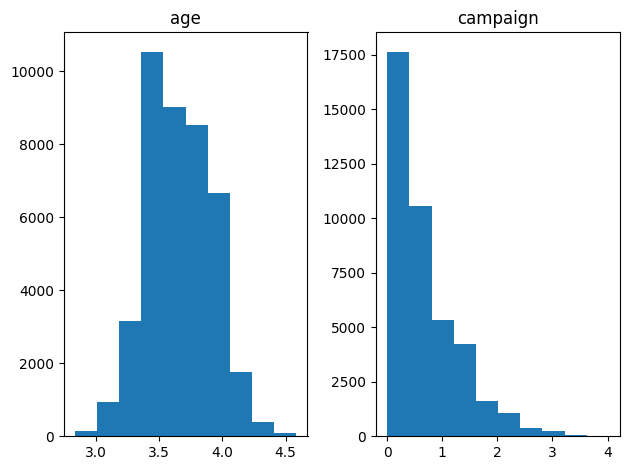

In [166]:
skewed_columns = ["age","campaign"]
fig, axes = plt.subplots(1,2)

for ind,col in enumerate(skewed_columns):
  dataset[col] = np.log(dataset[col])

  axes[ind].hist(dataset[col])
  axes[ind].set_title(col)
  axes[ind].set_xlabel('')
  axes[ind].set_ylabel('')

plt.tight_layout()
plt.show()


Umereno iskoseni podaci normalizuju se primenom korena

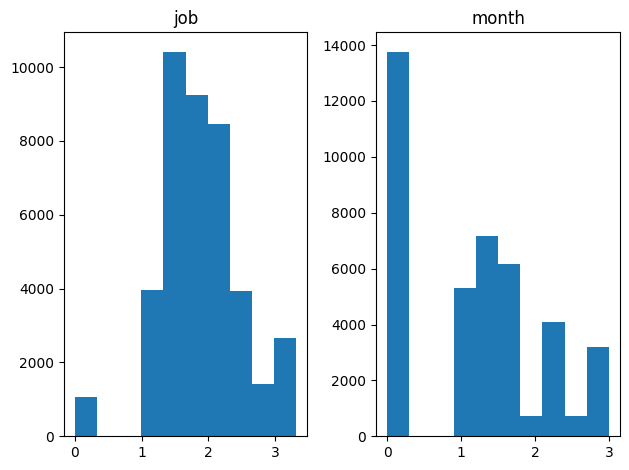

In [167]:
moderate_skewed_columns = ["job","month"]
fig, axes = plt.subplots(1,2)

for ind,col in enumerate(moderate_skewed_columns):
  dataset[col] = np.sqrt(dataset[col])

  axes[ind].hist(dataset[col])
  axes[ind].set_title(col)
  axes[ind].set_xlabel('')
  axes[ind].set_ylabel('')

plt.tight_layout()
plt.show()


Ostali numericki podaci standardizuju se

In [168]:
scaler = StandardScaler()
normalize_columns = ["education" , "duration", "pdays", "previous", "poutcome", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]
# normalize_columns = ["education","duration"]
normalized_data= scaler.fit_transform(dataset[normalize_columns])
dataset[normalize_columns] = normalized_data


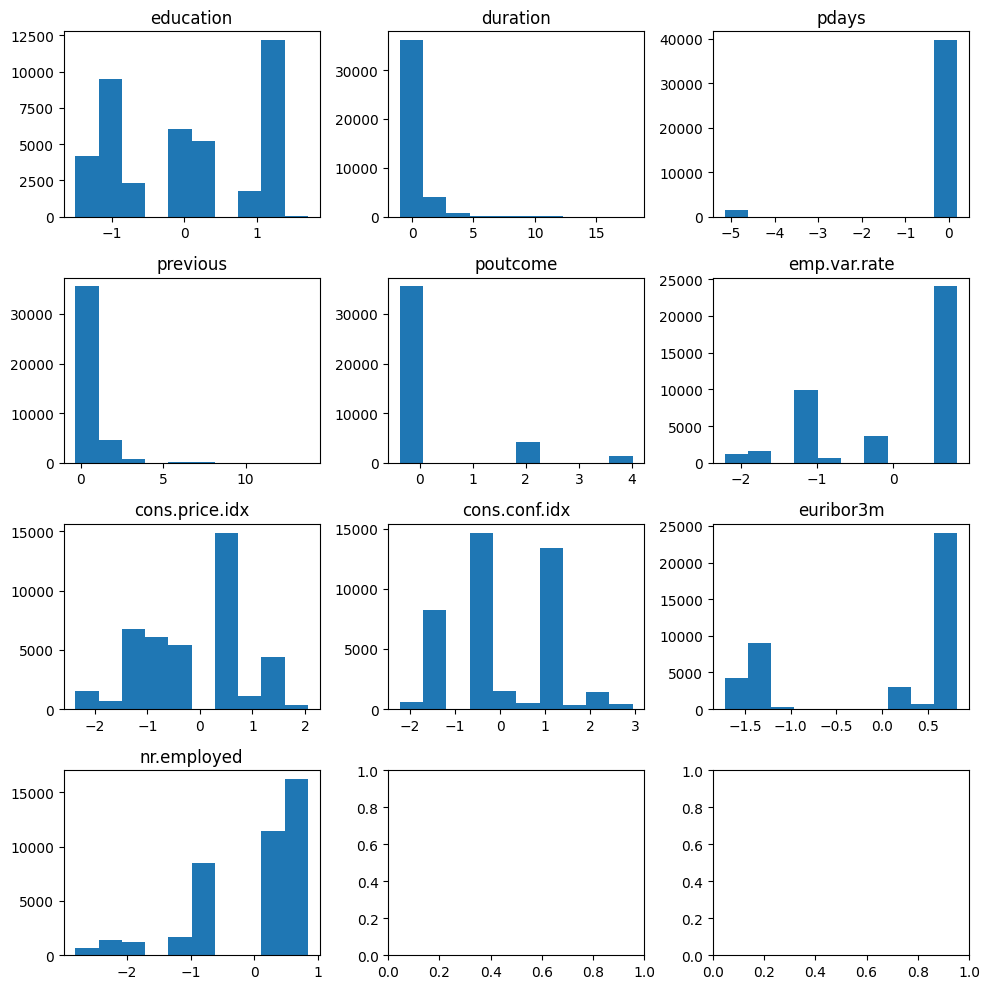

In [169]:
fig, axes = plt.subplots(4,3,figsize=(10,10))
axes = axes.flatten()
for ind,col in enumerate(normalize_columns):
  axes[ind].hist(dataset[col])
  axes[ind].set_title(col)
  axes[ind].set_xlabel('')
  axes[ind].set_ylabel('')

plt.tight_layout()
plt.show()


### Detekcija i otklanjanje outlier-a, normalizacija podataka

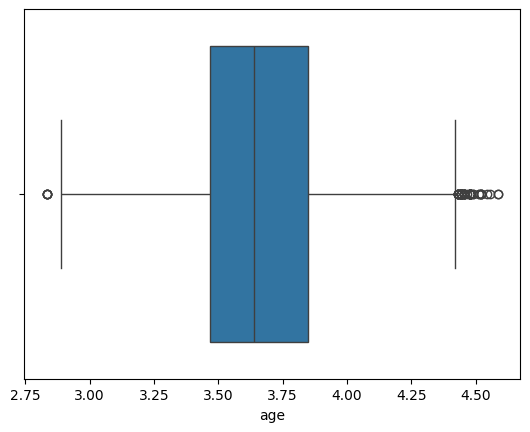

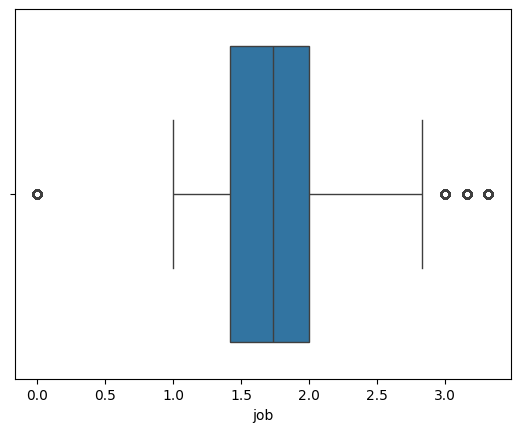

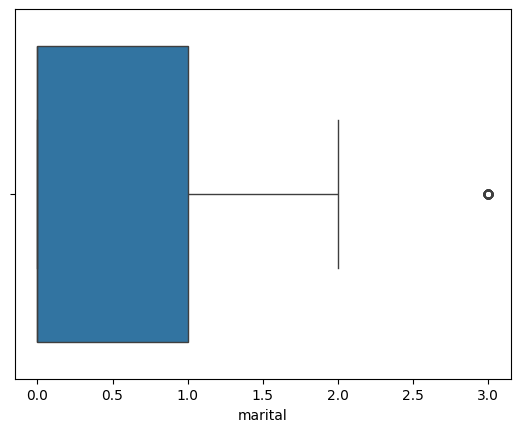

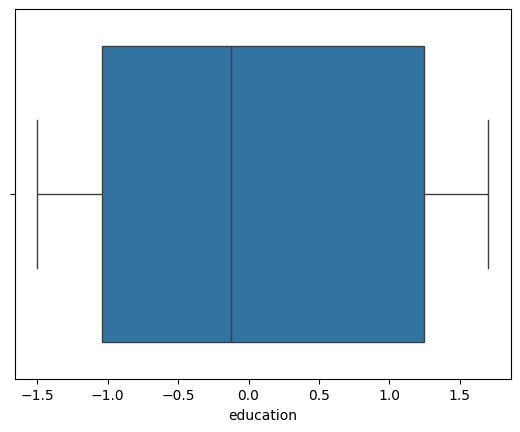

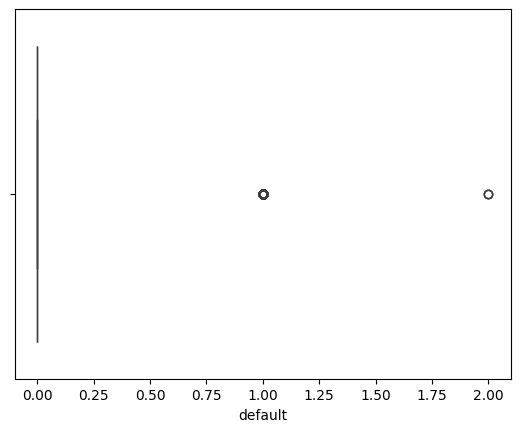

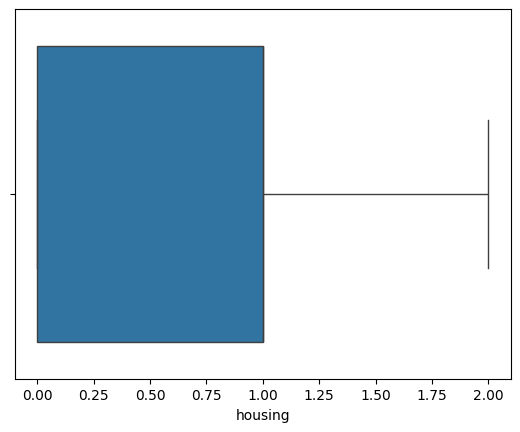

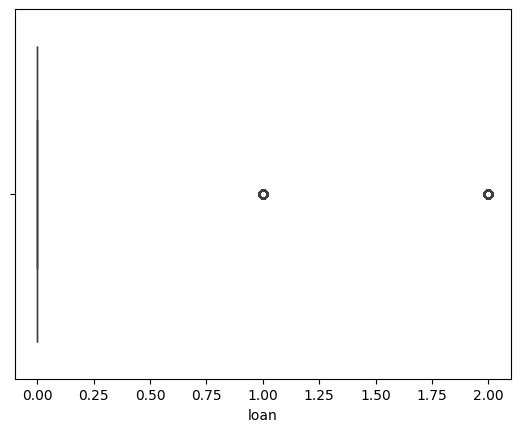

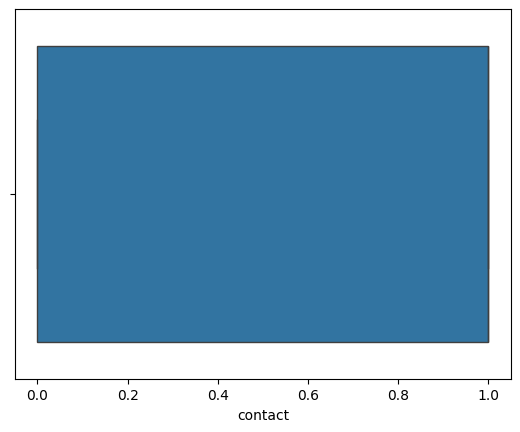

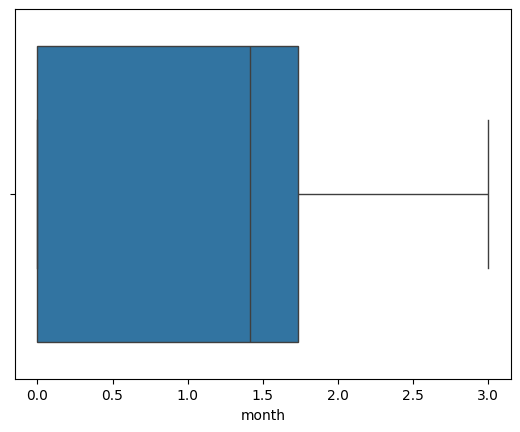

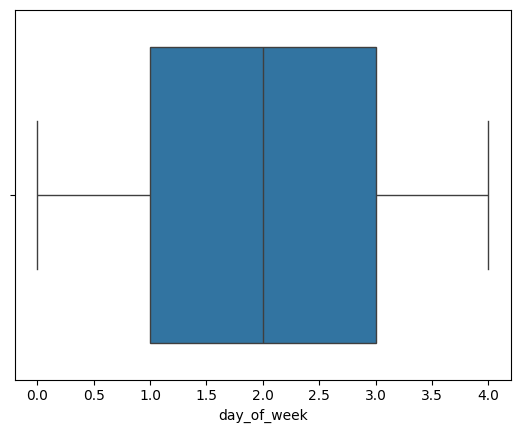

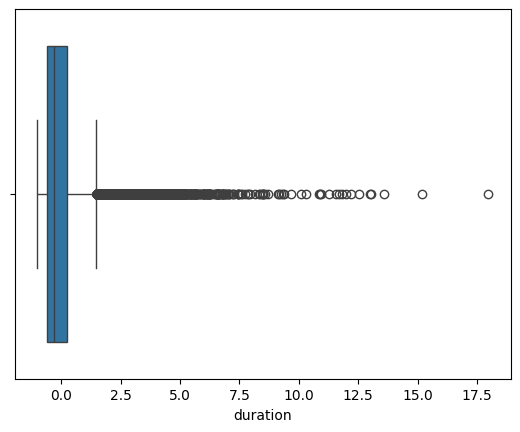

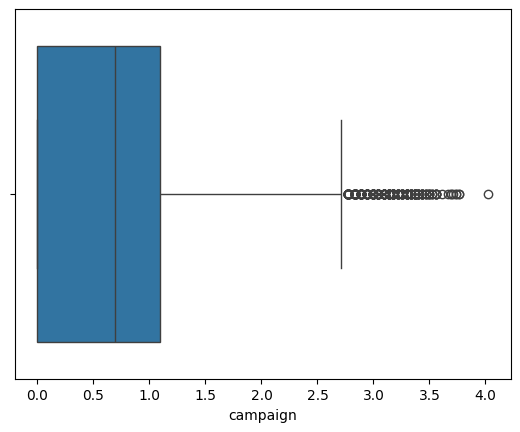

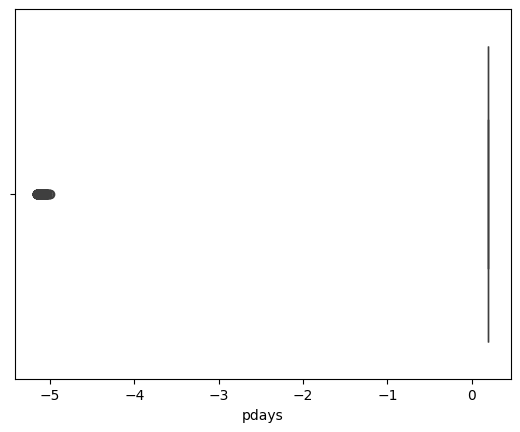

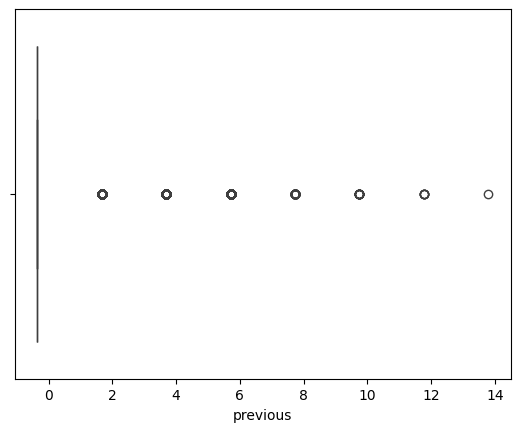

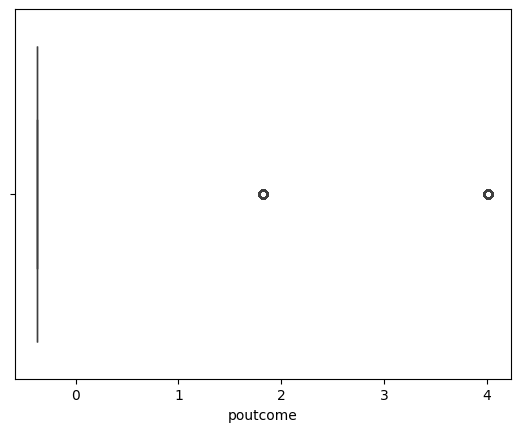

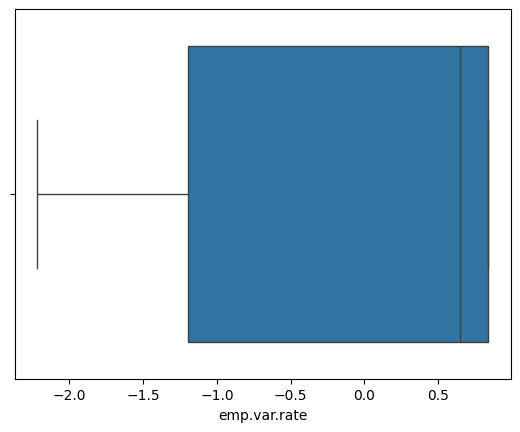

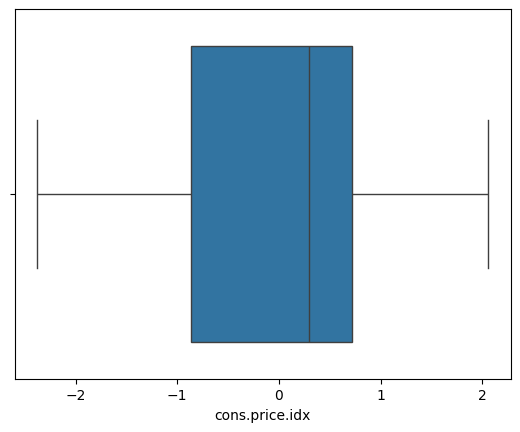

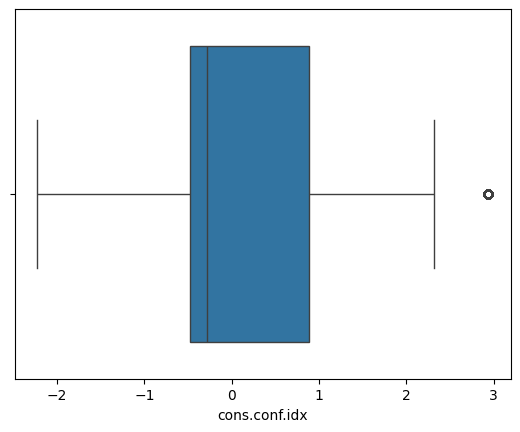

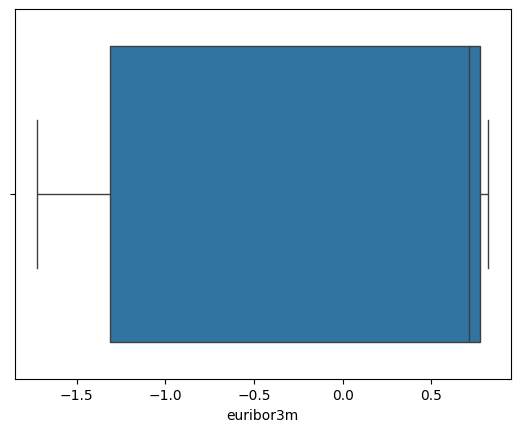

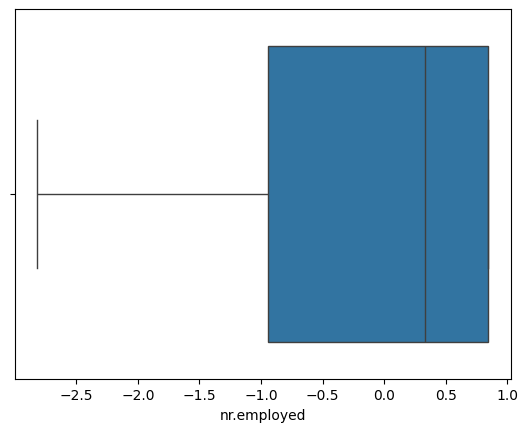

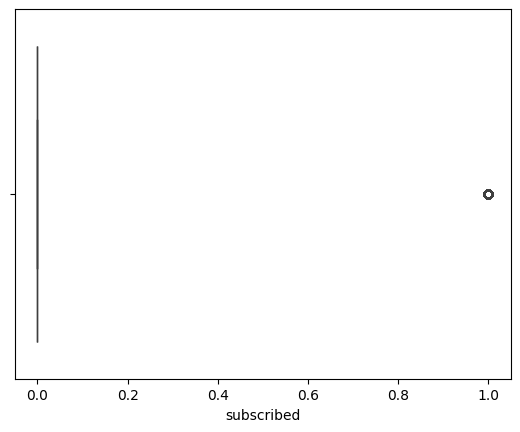

In [170]:
lista = ["age", "job","marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "duration", "campaign", "pdays", "previous", "poutcome", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "subscribed"]
for el in lista:
  sns.boxplot(x = dataset[el])
  plt.show()

####Druga varijanta dataseta

Kategoricki podaci kod kojih je jasno zastoupljenija jedna kategorija u odnosu na sve ostale transformisu se tako da imaju samo 2 moguce vrednosti

In [171]:
lista = ["marital", "default", "loan","poutcome"]
dataset_2 = dataset.copy()
for ind,el in enumerate(lista):
  dataset_2[el] = np.where(dataset_2[el] == 0, 0, 1)
dataset_2

age       job  marital  education  default  housing  loan  \
0      4.025352  0.000000        0  -1.499673        0        0     0   
1      4.043051  1.000000        0  -1.042111        1        0     0   
2      3.610918  1.000000        0  -1.042111        0        1     0   
3      3.688879  1.414214        0  -0.584550        0        0     0   
4      4.025352  1.000000        0  -1.042111        0        0     1   
...         ...       ...      ...        ...      ...      ...   ...   
41183  4.290459  2.236068        0   0.330573        0        1     0   
41184  3.828641  1.732051        0   0.330573        0        0     0   
41185  4.025352  2.236068        0   1.245696        0        1     0   
41186  3.784190  2.000000        0   0.330573        0        0     0   
41187  4.304065  2.236068        0   0.330573        0        1     0   

       contact     month  day_of_week  ...  campaign     pdays  previous  \
0            0  0.000000            0  ...  0.000000  0.195414 -0.349494   
1            0  0.000000            0  ...  0.000000  0.195414 -0.349494   
2            0  0.000000            0  ...  0.000000  0.195414 -0.349494   
3            0  0.000000            0  ...  0.000000  0.195414 -0.349494   
4            0  0.000000            0  ...  0.000000  0.195414 -0.349494   
...        ...       ...          ...  ...       ...       ...       ...   
41183        1  2.236068            4  ...  0.000000  0.195414 -0.349494   
41184        1  2.236068            4  ...  0.000000  0.195414 -0.349494   
41185        1  2.236068            4  ...  0.693147  0.195414 -0.349494   
41186        1  2.236068            4  ...  0.000000  0.195414 -0.349494   
41187        1  2.236068            4  ...  1.098612  0.195414  1.671136   

       poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0             1      0.648092        0.722722       0.886447   0.712460   
1             1      0.648092        0.722722       0.886447   0.712460   
2             1      0.648092        0.722722       0.886447   0.712460   
3             1      0.648092        0.722722       0.886447   0.712460   
4             1      0.648092        0.722722       0.886447   0.712460   
...         ...           ...             ...            ...        ...   
41183         1     -0.752343        2.058168      -2.224953  -1.495186   
41184         1     -0.752343        2.058168      -2.224953  -1.495186   
41185         1     -0.752343        2.058168      -2.224953  -1.495186   
41186         1     -0.752343        2.058168      -2.224953  -1.495186   
41187         1     -0.752343        2.058168      -2.224953  -1.495186   

       nr.employed  subscribed  
0         0.331680           0  
1         0.331680           0  
2         0.331680           0  
3         0.331680           0  
4         0.331680           0  
...            ...         ...  
41183    -2.815697           1  
41184    -2.815697           0  
41185    -2.815697           0  
41186    -2.815697           1  
41187    -2.815697           0  

[41188 rows x 21 columns]

# **ALGORITMI**

In [172]:
def eval_metrics(X,labels):
  silhouette = silhouette_score(X, labels)
  ch_index = calinski_harabasz_score(X,labels)
  db_index = davies_bouldin_score(X, labels)
  return (silhouette,db_index,ch_index)

In [173]:
def visualise_3d_data( datas, cluster_labels, n_clusters):
  pca = PCA(n_components=3)
  PCs = pd.DataFrame(pca.fit_transform(datas))
  PCs.columns = ["PC1","PC2","PC3"]
  PCs["cluster"] = cluster_labels
  cluster = []
  trace = []
  for i in range(n_clusters):
    cluster.append(PCs[PCs["cluster"]==i])
    trace.append (go.Scatter3d(
                    x = cluster[i]["PC1"],
                    y = cluster[i]["PC2"],
                    z = cluster[i]["PC3"],
                    mode = "markers",
                    name = "Cluster "+str(i),
                    # marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None))


  title = "Vizuelizacija klastera u 3D pomocu 3 PCA komponente"

  layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

  fig = dict(data = trace, layout = layout)

  iplot(fig)

In [174]:
def visualise_2d_data(datas, cluster_labels, n_clusters):
  pcas=PCA(n_components=2).fit_transform(datas)
  df2=pd.DataFrame(pcas,columns=['PC1','PC2'])
  sns.scatterplot(data=df2, x="PC1", y="PC2", hue=cluster_labels)
  plt.title("Vizuelizacija klastera u 2d pomocu 2 PCA komponente")
  plt.show()

In [175]:
pcas=PCA(n_components=2).fit_transform(dataset)
df2=pd.DataFrame(pcas,columns=['PC1','PC2'])

## Kmeans

In [176]:
from scipy.spatial.distance import cdist
inertias = []
mapping2 = {}
K = range(1, 12)
distortions = []
mapping1 = {}
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(dataset)
    kmeanModel.fit(dataset)
    distortions.append(sum(np.min(cdist(dataset, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / dataset.shape[0])
    mapping1[k] = sum(np.min(cdist(dataset, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / dataset.shape[0]
    inertias.append(kmeanModel.inertia_)
    mapping2[k] = kmeanModel.inertia_

In [177]:
print("Vrednosti distrozije po broj klastera")
for key, val in mapping1.items():
    print(f'{key} : {val}')

Vrednosti distrozije po broj klastera
1 : 3.6913650287156656
2 : 3.195397659473886
3 : 3.0337668694656728
4 : 2.854440107706939
5 : 2.7606542867947423
6 : 2.6898759944248862
7 : 2.6076150932171145
8 : 2.5556592662526554
9 : 2.5027815746300863
10 : 2.4589177197818985
11 : 2.425843796089128


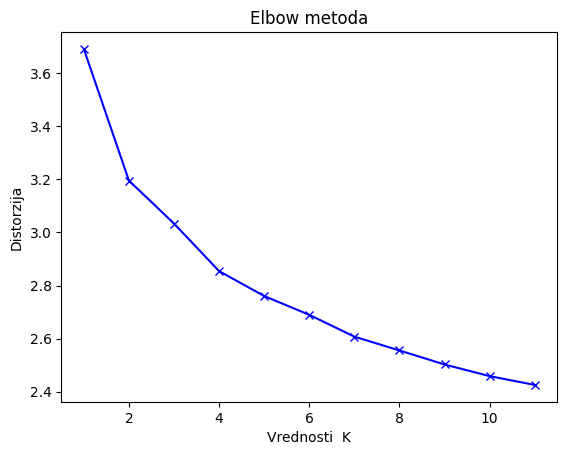

In [178]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Vrednosti  K')
plt.ylabel('Distorzija')
plt.title('Elbow metoda')
plt.show()

In [179]:
print("Vrednosti inercije po broj klastera")
for key, val in mapping2.items():
    print(f'{key} : {val}')

Vrednosti inercije po broj klastera
1 : 631425.3405406944
2 : 474669.1279857573
3 : 407115.17265450803
4 : 367195.09307091916
5 : 340396.85283842846
6 : 321577.40636241285
7 : 305634.37154894805
8 : 293727.4616294227
9 : 283660.95170666
10 : 270095.10949484084
11 : 264163.24255030265


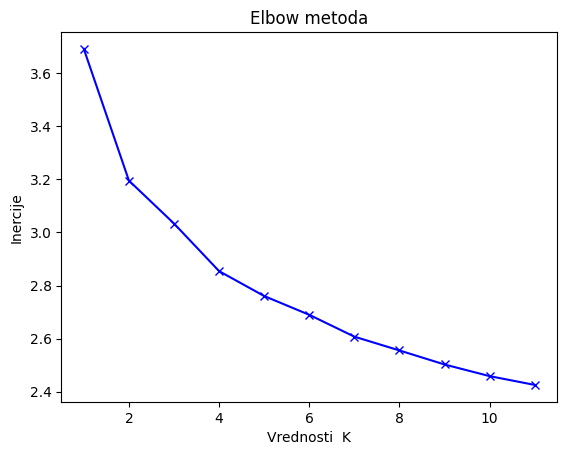

In [180]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Vrednosti  K')
plt.ylabel('Inercije')
plt.title('Elbow metoda')
plt.show()

In [181]:
kmeans = KMeans(n_clusters =4)
cluster_labels = kmeans.fit_predict(dataset)
results = eval_metrics(dataset,cluster_labels)
print("Silhouette Score : "+str(results[0])+" Davies-Bouldin Index: "+str(results[1])+"Calinski-Harabasz Index: "+str(results[2]))
results_df = pd.DataFrame()
results_df.loc[1,"KMeans"] = results[0]

Silhouette Score : 0.16992386604518878 Davies-Bouldin Index: 1.6498489644815606Calinski-Harabasz Index: 9878.544076019489


In [182]:
visualise_3d_data(dataset,cluster_labels,4)

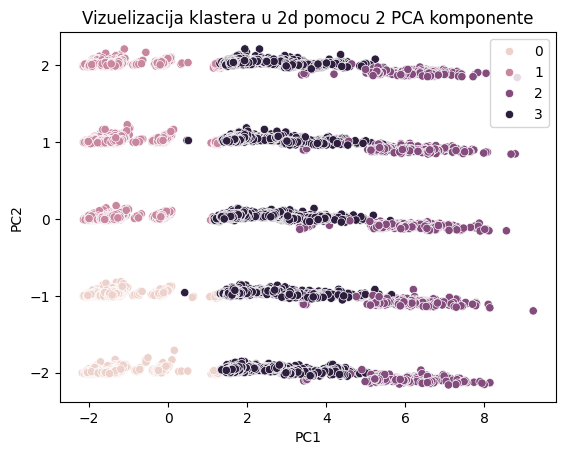

In [183]:
visualise_2d_data(dataset,cluster_labels,4)

In [184]:
unique_values, counts = np.unique(cluster_labels, return_counts=True)

In [185]:
clustering_dataframe = pd.DataFrame(counts)

In [186]:
clustering_dataframe.columns = ["KMeans"]

In [187]:
results_df

KMeans
1  0.169924

In [188]:
clustering_dataframe

KMeans
0   11101
1   16398
2    1537
3   12152

In [189]:
kmeans = KMeans(n_clusters =4)
cluster_labels = kmeans.fit_predict(df2)
results = eval_metrics(df2,cluster_labels)
print("Silhouette Score : "+str(results[0])+" Davies-Bouldin Index: "+str(results[1])+"Calinski-Harabasz Index: "+str(results[2]))
results_df.loc[1,"PCA_KMeans"] = results[0]

Silhouette Score : 0.516524642626481 Davies-Bouldin Index: 0.8108890221200817Calinski-Harabasz Index: 52734.52377635431


In [190]:
unique_values, counts = np.unique(cluster_labels, return_counts=True)
clustering_dataframe["PCA_Kmeans"] = counts

In [191]:
results_df

KMeans  PCA_KMeans
1  0.169924    0.516525

In [192]:
clustering_dataframe

KMeans  PCA_Kmeans
0   11101       16136
1   16398        5783
2    1537        8448
3   12152       10821

##Bisecting K-means

In [193]:
bisectingkmeans = BisectingKMeans(n_clusters =4)
cluster_labels = bisectingkmeans.fit_predict(dataset)
results = eval_metrics(dataset,cluster_labels)
print("Silhouette Score : "+str(results[0])+" Davies-Bouldin Index: "+str(results[1])+"Calinski-Harabasz Index: "+str(results[2]))
results_df.loc[1,"BisectingKMeans"] = results[0]

Silhouette Score : 0.13733267375248376 Davies-Bouldin Index: 1.8845460378968608Calinski-Harabasz Index: 7462.77928516293


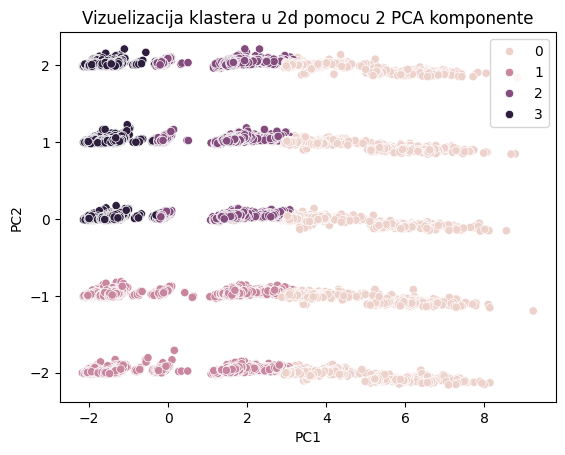

In [194]:
visualise_2d_data(dataset,cluster_labels,4)
visualise_3d_data(dataset,cluster_labels,4)

In [195]:
unique_values, counts = np.unique(cluster_labels, return_counts=True)
clustering_dataframe["Bisecting Kmeans"] = counts

In [196]:
results_df

KMeans  PCA_KMeans  BisectingKMeans
1  0.169924    0.516525         0.137333

In [197]:
clustering_dataframe

KMeans  PCA_Kmeans  Bisecting Kmeans
0   11101       16136              4927
1   16398        5783             14641
2    1537        8448              7285
3   12152       10821             14335

In [198]:
bisectingkmeans = BisectingKMeans(n_clusters =4)
cluster_labels = bisectingkmeans.fit_predict(df2)
results = eval_metrics(df2,cluster_labels)
print("Silhouette Score : "+str(results[0])+" Davies-Bouldin Index: "+str(results[1])+"Calinski-Harabasz Index: "+str(results[2]))
results_df.loc[1,"PCA_BisectingKMeans"] = results[0]

Silhouette Score : 0.5105757848760489 Davies-Bouldin Index: 0.7468223050428169Calinski-Harabasz Index: 50709.23961838911


In [199]:
unique_values, counts = np.unique(cluster_labels, return_counts=True)
clustering_dataframe["PCA_BisectingKMeans"] = counts

##Gaussian Mixture

In [200]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components = 4,random_state=42)

In [201]:
cluster_labels = gmm.fit_predict(dataset)
results = eval_metrics(dataset,cluster_labels)
print("Silhouette Score : "+str(results[0])+" Davies-Bouldin Index: "+str(results[1])+"Calinski-Harabasz Index: "+str(results[2]))
results_df.loc[1,"Gaussian Mixture"] = results[0]

Silhouette Score : 0.09975477726149581 Davies-Bouldin Index: 3.3015872624880185Calinski-Harabasz Index: 7460.016926791017


In [202]:
unique_values, counts = np.unique(cluster_labels, return_counts=True)
clustering_dataframe["Gaussian Mixture"] = counts

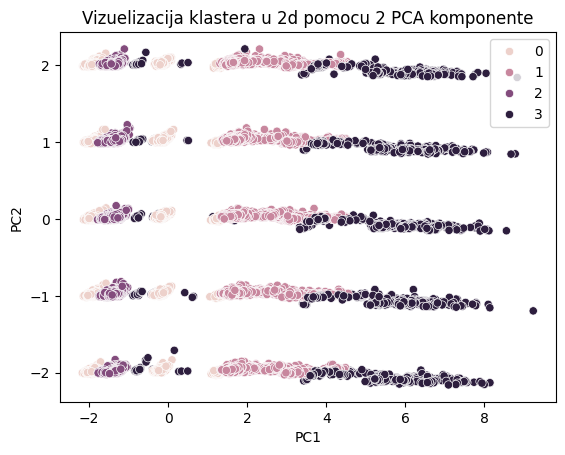

In [203]:
visualise_2d_data(dataset,cluster_labels,4)

In [204]:
cluster_labels = gmm.fit_predict(df2)
results = eval_metrics(df2,cluster_labels)
print("Silhouette Score : "+str(results[0])+" Davies-Bouldin Index: "+str(results[1])+"Calinski-Harabasz Index: "+str(results[2]))
results_df.loc[1,"PCA_Gaussian Mixture"] = results[0]

Silhouette Score : 0.4654669162073473 Davies-Bouldin Index: 0.8838660347437242Calinski-Harabasz Index: 38707.1393547403


In [205]:
unique_values, counts = np.unique(cluster_labels, return_counts=True)
clustering_dataframe["PCA_Gaussian Mixture"] = counts

In [206]:
results_df

KMeans  PCA_KMeans  BisectingKMeans  PCA_BisectingKMeans  \
1  0.169924    0.516525         0.137333             0.510576   

   Gaussian Mixture  PCA_Gaussian Mixture  
1          0.099755              0.465467

In [207]:
clustering_dataframe

KMeans  PCA_Kmeans  Bisecting Kmeans  PCA_BisectingKMeans  \
0   11101       16136              4927                12223   
1   16398        5783             14641                 2008   
2    1537        8448              7285                16136   
3   12152       10821             14335                10821   

   Gaussian Mixture  PCA_Gaussian Mixture  
0              7931                  9756  
1             11603                  7315  
2             19623                 14241  
3              2031                  9876

##Hierarchical Clustering

In [208]:
from sklearn.cluster import AgglomerativeClustering


In [209]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [210]:
# linkage_data = linkage(df2,method = "ward",metric = "euclidean")

In [211]:
# dendrogram(linkage_data)
# plt.show()

In [212]:
# hierarchical_cluster = AgglomerativeClustering(n_clusters = 4, affinity = "euclidean",linkage = "ward")
# cluster_labels = hierarchical_cluster.fit_predict(df2)

In [213]:
# results = eval_metrics(df2,cluster_labels)
# print("Silhouette Score : "+str(results[0])+" Davies-Bouldin Index: "+str(results[1])+"Calinski-Harabasz Index: "+str(results[2]))
# results_df.loc[1,"Hierarchical Clustering(ward)"] = results[0]

In [214]:
# visualise_2d_data(dataset,cluster_labels,4)

In [215]:
# results_df

## DBSCAN

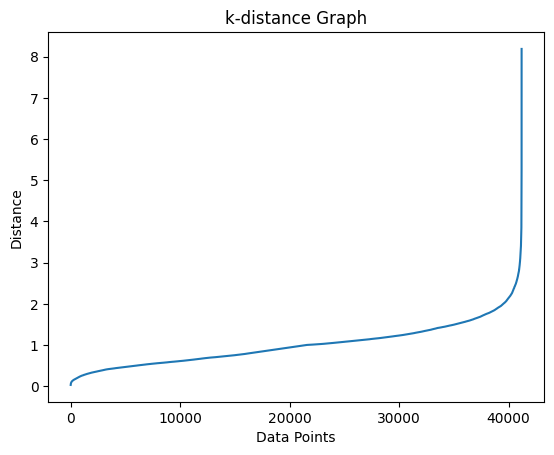

In [216]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=4)
distances, indices = neigh.fit(dataset).kneighbors(dataset)
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('k-distance Graph')
plt.show()

In [217]:
dbscan = DBSCAN(eps = 2.75, n_jobs=-1)
cluster_labels = dbscan.fit_predict(dataset)
max(cluster_labels)

3

In [218]:
results = eval_metrics(dataset,cluster_labels)
print("Silhouette Score : "+str(results[0])+" Davies-Bouldin Index: "+str(results[1])+"Calinski-Harabasz Index: "+str(results[2]))
results_df.loc[1,"DBSCAN"] = results[0]

Silhouette Score : 0.2389458490253637 Davies-Bouldin Index: 1.968267519982127Calinski-Harabasz Index: 3303.7085306796844


In [219]:
unique_values, counts = np.unique(cluster_labels, return_counts=True)
unique_values

array([-1,  0,  1,  2,  3])

In [220]:
clustering_dataframe["DBSCAN"] = counts[1:5]

In [221]:
results_df

KMeans  PCA_KMeans  BisectingKMeans  PCA_BisectingKMeans  \
1  0.169924    0.516525         0.137333             0.510576   

   Gaussian Mixture  PCA_Gaussian Mixture    DBSCAN  
1          0.099755              0.465467  0.238946

In [222]:
clustering_dataframe

KMeans  PCA_Kmeans  Bisecting Kmeans  PCA_BisectingKMeans  \
0   11101       16136              4927                12223   
1   16398        5783             14641                 2008   
2    1537        8448              7285                16136   
3   12152       10821             14335                10821   

   Gaussian Mixture  PCA_Gaussian Mixture  DBSCAN  
0              7931                  9756   35527  
1             11603                  7315    4069  
2             19623                 14241    1417  
3              2031                  9876       4

Na osnovu dobijenih tabela zakljucuje se da primena KMeans algoritma za klasterovanje u 4 klastera, daje najbolje rezultate, sa malom razlikom u odnosu na Bisecting KMeans i Gaussian Mixture, sve nad podacima redukovane dimenzionalnosti. KMeans i Gaussian Mixture bice testirani i na drugoj varijanti dataseta.

##Druga varijanta

In [223]:
kmeans = KMeans(n_clusters =4)
cluster_labels = kmeans.fit_predict(dataset_2)
results = eval_metrics(dataset_2,cluster_labels)
print("Silhouette Score : "+str(results[0])+" Davies-Bouldin Index: "+str(results[1])+"Calinski-Harabasz Index: "+str(results[2]))
results_df_2 = pd.DataFrame()
results_df_2.loc[1,"KMeans"] = results[0]

Silhouette Score : 0.17896779164819634 Davies-Bouldin Index: 1.6419446085231888Calinski-Harabasz Index: 9668.543718253422


In [224]:
pcas=PCA(n_components=2).fit_transform(dataset_2)
df2_2 = pd.DataFrame(pcas,columns=['PC1','PC2'])

In [225]:
kmeans = KMeans(n_clusters =4)
cluster_labels = kmeans.fit_predict(df2_2)
results = eval_metrics(df2_2,cluster_labels)
print("Silhouette Score : "+str(results[0])+" Davies-Bouldin Index: "+str(results[1])+"Calinski-Harabasz Index: "+str(results[2]))
results_df_2.loc[1,"PCA_KMeans"] = results[0]

Silhouette Score : 0.5286843093087058 Davies-Bouldin Index: 0.6972283289533856Calinski-Harabasz Index: 68521.03064207292


In [226]:
gmm = GaussianMixture(n_components = 4,random_state=42)
cluster_labels = gmm.fit_predict(dataset_2)
results = eval_metrics(dataset_2,cluster_labels)
print("Silhouette Score : "+str(results[0])+" Davies-Bouldin Index: "+str(results[1])+"Calinski-Harabasz Index: "+str(results[2]))
results_df_2.loc[1,"Gaussian Mixture"] = results[0]

Silhouette Score : 0.1030487632395221 Davies-Bouldin Index: 3.230103287296378Calinski-Harabasz Index: 7266.531334937932


In [227]:
gmm = GaussianMixture(n_components = 4,random_state=42)
cluster_labels = gmm.fit_predict(dataset_2)
results = eval_metrics(dataset_2,cluster_labels)
print("Silhouette Score : "+str(results[0])+" Davies-Bouldin Index: "+str(results[1])+"Calinski-Harabasz Index: "+str(results[2]))
results_df_2.loc[1,"PCA_Gaussian Mixture"] = results[0]

Silhouette Score : 0.1030487632395221 Davies-Bouldin Index: 3.230103287296378Calinski-Harabasz Index: 7266.531334937932


In [228]:
results_df_2

KMeans  PCA_KMeans  Gaussian Mixture  PCA_Gaussian Mixture
1  0.178968    0.528684          0.103049              0.103049

##Rezultati

In [229]:
results_df

KMeans  PCA_KMeans  BisectingKMeans  PCA_BisectingKMeans  \
1  0.169924    0.516525         0.137333             0.510576   

   Gaussian Mixture  PCA_Gaussian Mixture    DBSCAN  
1          0.099755              0.465467  0.238946

In [230]:
results_df_2

KMeans  PCA_KMeans  Gaussian Mixture  PCA_Gaussian Mixture
1  0.178968    0.528684          0.103049              0.103049

Na osnovu dobijenih rezultata moze se zakljuciti da se najveca tacnost postize kada se primeni KMeans algoritam nad podacima redukovane dimenzionalnosti u drugoj varijanti dataseta.